<a href="https://colab.research.google.com/github/deepakfr/animal-pet-classification/blob/master/pet_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN pet classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.17.1'

In [ ]:
import zipfile
import os

# Path to your uploaded ZIP file
zip_path = '/content/dataset.zip'

# Extract to a directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# Check contents of the extracted folder
print(os.listdir('/content/dataset'))


['__MACOSX', 'dataset']


# Data Preprocessing

## Train Set

In [ ]:
import os

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory("/content/dataset/dataset/training_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory("/content/dataset/dataset/test_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


Images in the training data

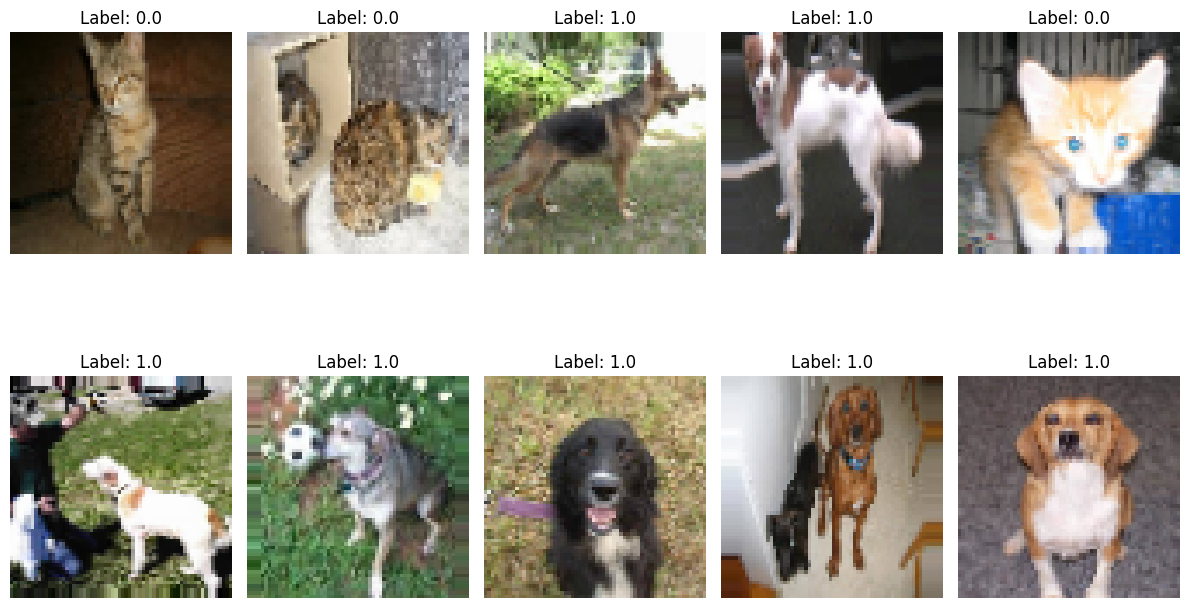

In [63]:
import matplotlib.pyplot as plt

images, labels = next(training_set)

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


# Building CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Adding Convultional

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64, 64, 3]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Max Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding Second convolution layer and max pooling

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Flatenning

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Full Connected

In [ ]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

### Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

### model compile

In [ ]:
cnn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

###  train the model on the train data and test

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs= 25)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 72s 277ms/step - accuracy: 0.5362 - loss: 0.7094 - val_accuracy: 0.6490 - val_loss: 0.6230
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 81s 272ms/step - accuracy: 0.6444 - loss: 0.6325 - val_accuracy: 0.6860 - val_loss: 0.6016
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 252ms/step - accuracy: 0.6968 - loss: 0.5787 - val_accuracy: 0.7330 - val_loss: 0.5392
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 85s 264ms/step - accuracy: 0.7188 - loss: 0.5457 - val_accuracy: 0.7405 - val_loss: 0.5389
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 257ms/step - accuracy: 0.7374 - loss: 0.5181 - val_accuracy: 0.7635 - val_loss: 0.5033
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 68s 267ms/step - accuracy: 0.7606 - loss: 0.4938 - val_accuracy: 0.7575 - val_loss: 0.5121
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 67s 265ms/step - accuracy: 0.7812 - loss: 0.4694 - val_accuracy: 0.7725 - val_loss: 0.4844
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 65s 259ms/step - accuracy: 0.7779 - loss: 0.4602 - val

In [55]:
cnn.save('my_model.h5')

In [56]:
import numpy as np
from keras.preprocessing import image


In [57]:
test_image = image.load_img('/content/dataset/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.array_to_img(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'The pet is a dog'
else:
  prediction = 'The pet is a cat'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


In [58]:
print(prediction)

The pet is a dog


In [64]:
test_image = image.load_img('/content/dataset/dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.array_to_img(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'The pet is a dog'
else:
  prediction = 'The pet is a cat'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [65]:
print(prediction)

The pet is a cat
